### importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, chi2_contingency

### carregando o Dataset

In [2]:

df = pd.read_csv('vgsales.csv')

df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### criando dicionario 

In [3]:
# configurar para mostrar apenas 2 digitos de casas decimais
pd.options.display.float_format = '{:.2f}'.format


df.rename(columns={
    'Name':'Jogos',
    'Platform':'Plataforma',
    'Year':'Ano',
    'Genre':'Gênero',
    'Publisher':'Publicação',
    'NA_Sales':'America do Norte',
    'EU_Sales':'Europa',
    'JP_Sales':'Japão',
    'Other_Sales':'Resto do Mundo',
    'Global_Sales':'Geral'    
    
}, inplace=True)

df.head()

,Rank,Jogos,Plataforma,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# analise exploratoria

### ● Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma?
- Rank: `int64` - classifica os jogos em uma ordem específica.
- Jogos: `object` - nome dos jogos.
- Plataforma: `object` - plataforma em que os jogos estão disponíveis.
- Ano: `float64` - ano de lançamento do jogo (possui alguns valores nulos).
- Gênero: `object` - genero do jogo .
- Publicação: `object` - nome da empresa responsável pela publicação do jogo (também possui alguns valores nulos).
- America do Norte: `float64` - vendas na America do Norte.
- Europa: `float64` - vendas na Europa.
- Japão: `float64` - vendas no Japão.
- Resto do Mundo: `float64` - vendas no resto do mundo.
- Geral: `float64` - total de vendas globais.

In [4]:
# tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              16598 non-null  int64  
 1   Jogos             16598 non-null  object 
 2   Plataforma        16598 non-null  object 
 3   Ano               16327 non-null  float64
 4   Gênero            16598 non-null  object 
 5   Publicação        16540 non-null  object 
 6   America do Norte  16598 non-null  float64
 7   Europa            16598 non-null  float64
 8   Japão             16598 non-null  float64
 9   Resto do Mundo    16598 non-null  float64
 10  Geral             16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### ● Há valores ausentes no conjunto de dados? Explique-os.

#### Análise textual para valores ausentes 
- Alguns fatores que podem contribuir para a ausencia dos valores nas colunas ano e publicacao, podem incluir a falta de informacao no momento da coleta dos dados, problemas de coleta ou registro, especialmente em jogos mais antigos e menos conhecidos.

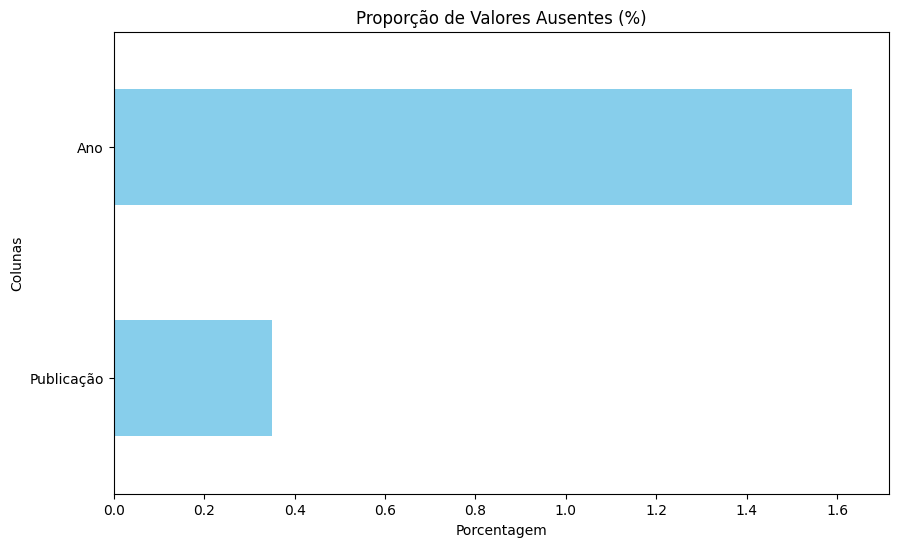

In [5]:
# valores ausentes
df.isnull().sum()

# Proporção de valores ausentes
missing_values = df.isnull().mean() * 100

# Visualização da proporção de valores ausentes
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values().plot(kind='barh', color='skyblue')
plt.title('Proporção de Valores Ausentes (%)')
plt.xlabel('Porcentagem')
plt.ylabel('Colunas')
plt.show()

In [6]:
df[df.isnull().any(axis=1)]

,Rank,Jogos,Plataforma,Ano,Gênero,Publicação,America do Norte,Europa,Japão,Resto do Mundo,Geral
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.00,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.00,Racing,NaN,0.00,0.01,0.00,0.00,0.01


### ● Qual é a estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão?

In [7]:
# estatisticas descritivas das variaveis numericas
df.describe()

,Rank,Ano,America do Norte,Europa,Japão,Resto do Mundo,Geral
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


# visualizacao dos dados
### ● Como as variáveis numéricas estão distribuídas?

#### Análise textual para histogramas
A distribuição de 'Geral' parece assimétrica à direita, com um grande número de jogos com vendas globais menores.
Já 'America do Norte' e 'Europa' seguem uma distribuição similar, enquanto 'Japão' tem uma distribuição mais concentrada em valores menores.

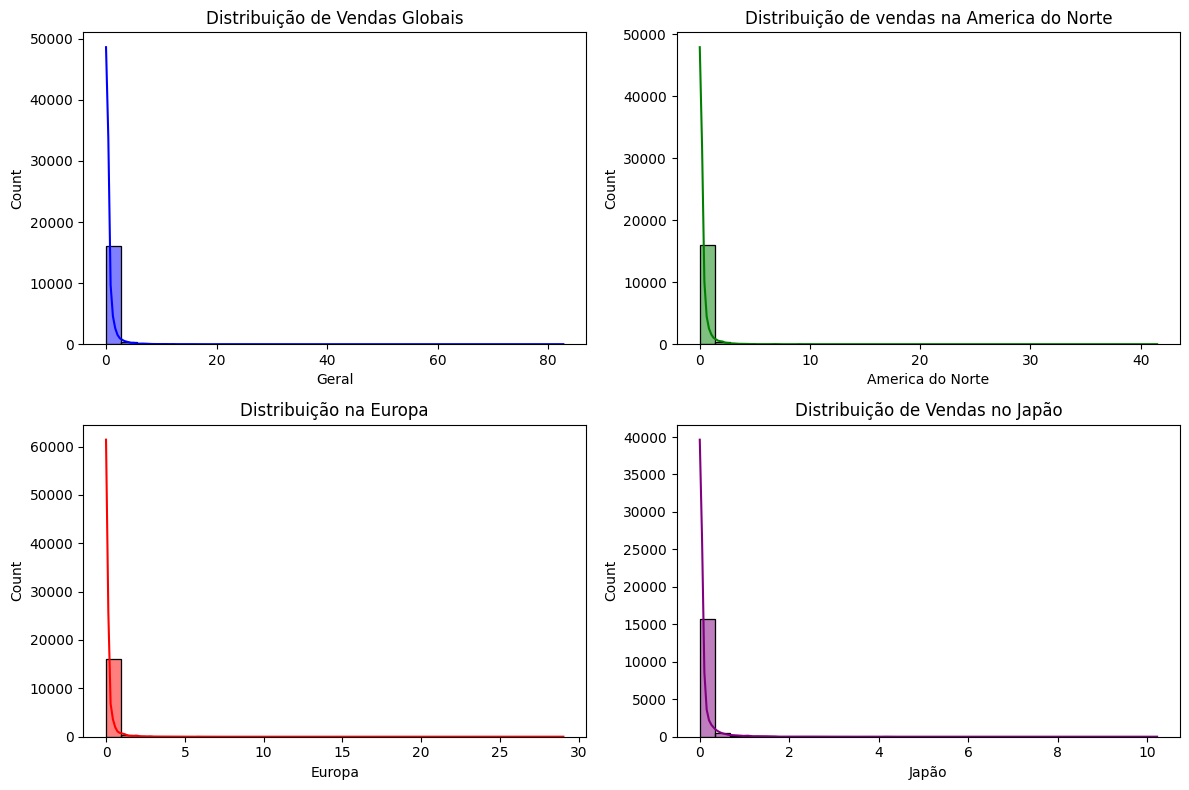

In [8]:
# Criar histogramas para as variaveis numericas
plt.figure(figsize=(12, 8))

#Global_Sales
plt.subplot(2, 2, 1)
sns.histplot(df['Geral'], kde=True, bins=30, color='blue')
plt.title('Distribuição de Vendas Globais')

#NA_Sales
plt.subplot(2, 2, 2)
sns.histplot(df['America do Norte'], kde=True, bins=30, color='green')
plt.title('Distribuição de vendas na America do Norte')

#EU_Sales
plt.subplot(2, 2, 3)
sns.histplot(df['Europa'], kde=True, bins=30, color='red')
plt.title('Distribuição na Europa')

#JP_Sales
plt.subplot(2, 2, 4)
sns.histplot(df['Japão'], kde=True, bins=30, color='purple')
plt.title('Distribuição de Vendas no Japão')

plt.tight_layout()
plt.show()

#### Análise textual para boxplots
Nos boxplots, observamos a presença de outliers em todas as regiões, indicando alguns jogos com desempenho excepcional.
Esses outliers, representados por vendas muito altas, podem ser explicados por jogos muito populares.

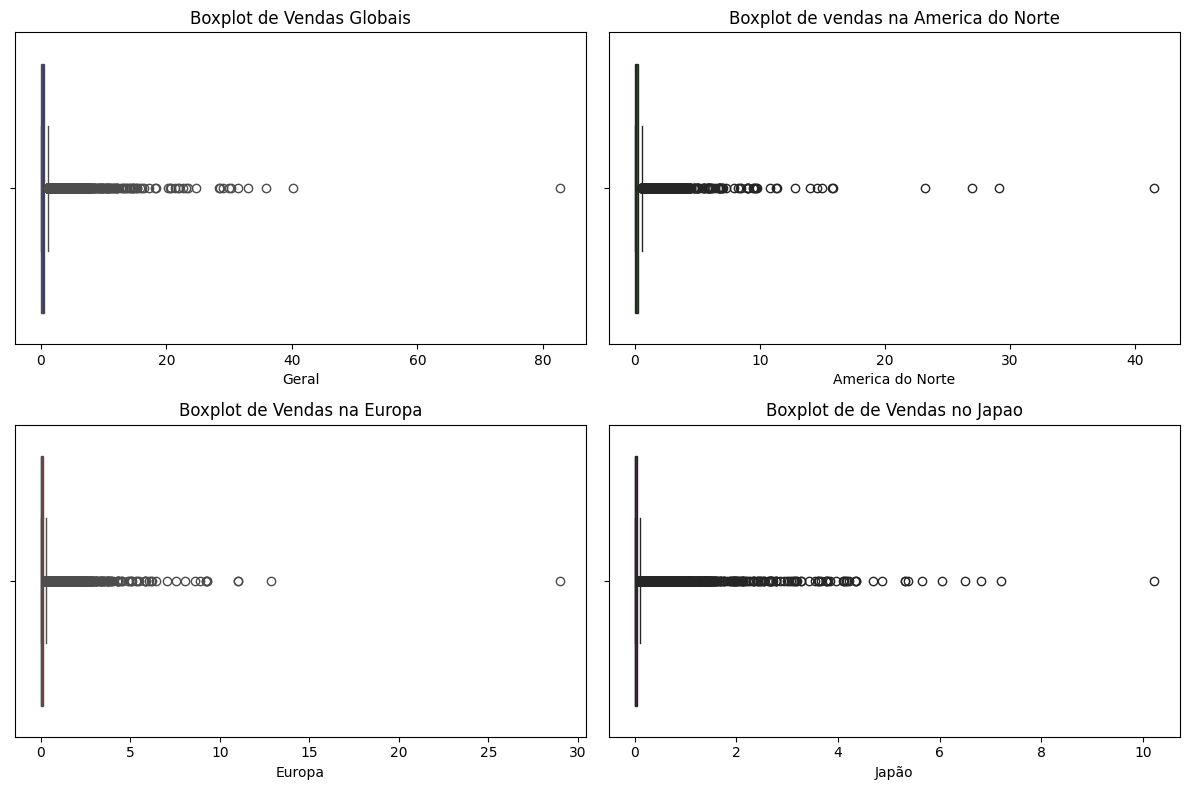

In [9]:
#boxplots para as variaveis numericas
plt.figure(figsize=(12, 8))

#Geral
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Geral'], color='blue')
plt.title('Boxplot de Vendas Globais')

#America do Norte
plt.subplot(2, 2, 2)
sns.boxplot(x=df['America do Norte'], color='green')
plt.title('Boxplot de vendas na America do Norte')

#Europa
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Europa'], color='red')
plt.title('Boxplot de Vendas na Europa')

#Japão
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Japão'], color='purple')
plt.title('Boxplot de de Vendas no Japao')

plt.tight_layout()
plt.show()


### ● Existe alguma correlação entre as variáveis numéricas?

#### Análise textual da correlação
- America do Norte e Europa tem a maior influencia nas vendas totais de jogos, com correlacoes muito altas em relacao as vendas globais.
- O Japao embora importante, tem uma menor influencia no total de vendas, com uma correlacao mais fraca, especialmente com o Resto do Mundo.
- As vendas no Resto do Mundo tambem desempenham um papel relevante, embora nao tanto como America do Norte e Europa.
- As regioes ocidentais parecem estar interconectadas, enquanto o japao opera de maneira mais independente, com uma correlacao mais fraca com o resto do mundo.

A partir desses padroes podemos iferir que existem diferentes preferencias de mercado, onde o japao tem caracteristicas mais especificas em relacao ao Ocidente.

In [10]:
#calculo da correlacao entre as variaveis numericas
matriz_correlacao = df[['America do Norte', 'Europa', 'Japão', 'Resto do Mundo', 'Geral']].corr()

print(matriz_correlacao)


                  America do Norte  Europa  Japão  Resto do Mundo  Geral
America do Norte              1.00    0.77   0.45            0.63   0.94
Europa                        0.77    1.00   0.44            0.73   0.90
Japão                         0.45    0.44   1.00            0.29   0.61
Resto do Mundo                0.63    0.73   0.29            1.00   0.75
Geral                         0.94    0.90   0.61            0.75   1.00


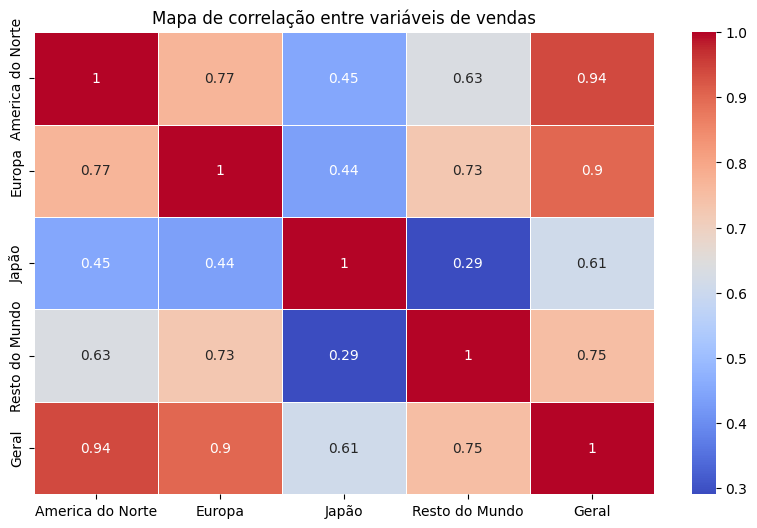

In [11]:
#mapa de calor para a matriz de correlacao
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Mapa de correlação entre variáveis de vendas')
plt.show()

In [12]:
from scipy.stats import pearsonr

colunas_numericas = ['America do Norte', 'Europa', 'Japão', 'Resto do Mundo', 'Geral']

#teste de hipótese para cada par de variaveis
for i in range(len(colunas_numericas)):
    for j in range(i + 1, len(colunas_numericas)):
        var1 = colunas_numericas[i]
        var2 = colunas_numericas[j]
        
        #calcula Pearson e o p-valor
        corr, p_value = pearsonr(df[var1], df[var2])
        
        print(f"Correlação entre {var1} e {var2}:")
        print(f"Coeficiente de correlação: {corr:.4f}")
        print(f"P-valor: {p_value:.4f}")
        
        #p-valor
        if p_value < 0.05:
            print("Resultado: Correlação significativa (rejeitamos H0)\n")
        else:
            print("Resultado: Não há correlação significativa (não rejeitamos H0)\n")


Correlação entre America do Norte e Europa:
Coeficiente de correlação: 0.7677
P-valor: 0.0000
Resultado: Correlação significativa (rejeitamos H0)

Correlação entre America do Norte e Japão:
Coeficiente de correlação: 0.4498
P-valor: 0.0000
Resultado: Correlação significativa (rejeitamos H0)

Correlação entre America do Norte e Resto do Mundo:
Coeficiente de correlação: 0.6347
P-valor: 0.0000
Resultado: Correlação significativa (rejeitamos H0)

Correlação entre America do Norte e Geral:
Coeficiente de correlação: 0.9410
P-valor: 0.0000
Resultado: Correlação significativa (rejeitamos H0)

Correlação entre Europa e Japão:
Coeficiente de correlação: 0.4356
P-valor: 0.0000
Resultado: Correlação significativa (rejeitamos H0)

Correlação entre Europa e Resto do Mundo:
Coeficiente de correlação: 0.7264
P-valor: 0.0000
Resultado: Correlação significativa (rejeitamos H0)

Correlação entre Europa e Geral:
Coeficiente de correlação: 0.9028
P-valor: 0.0000
Resultado: Correlação significativa (rejei

### ● Como os dados categóricos estão distribuídos?

#### Analise textual da distribuicao
- A análise dos gêneros de jogos revela que os jogos das categorias 'Action' e 'Sports' dominam o mercado.
- Além disso, as vendas na América do Norte têm uma correlação forte com as vendas globais, o que sugere que o mercado norte-americano é um bom indicador de sucesso global.

In [13]:
 # Função para remover outliers baseada no IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[coluna] >= lower_bound) & (df[coluna] <= upper_bound)]

# Removendo outliers de Geral
df_sem_outliers = remover_outliers(df, 'Geral')

# Comparando o antes e depois
print(f"Número de linhas antes de remover outliers: {df.shape[0]}")
print(f"Número de linhas após remover outliers: {df_sem_outliers.shape[0]}")

Número de linhas antes de remover outliers: 16598
Número de linhas após remover outliers: 14705


In [14]:
#contar as frequencias das categorias na coluna 'Gênero'
genero_counts = df['Gênero'].value_counts()
print(genero_counts)

#contar as frequencias das categorias na coluna 'Platforma'
plataforma_counts = df['Plataforma'].value_counts()
print(plataforma_counts)

#contar as frequencias das categorias na coluna 'Publicaçãor'
publisher_counts = df['Publicação'].value_counts()
print(publisher_counts)


Gênero
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64
Plataforma
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64
Publicação
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New W

C:\Users\marco\AppData\Local\Temp\ipykernel_4920\2471665388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gênero', order=df['Gênero'].value_counts().index, palette='viridis')


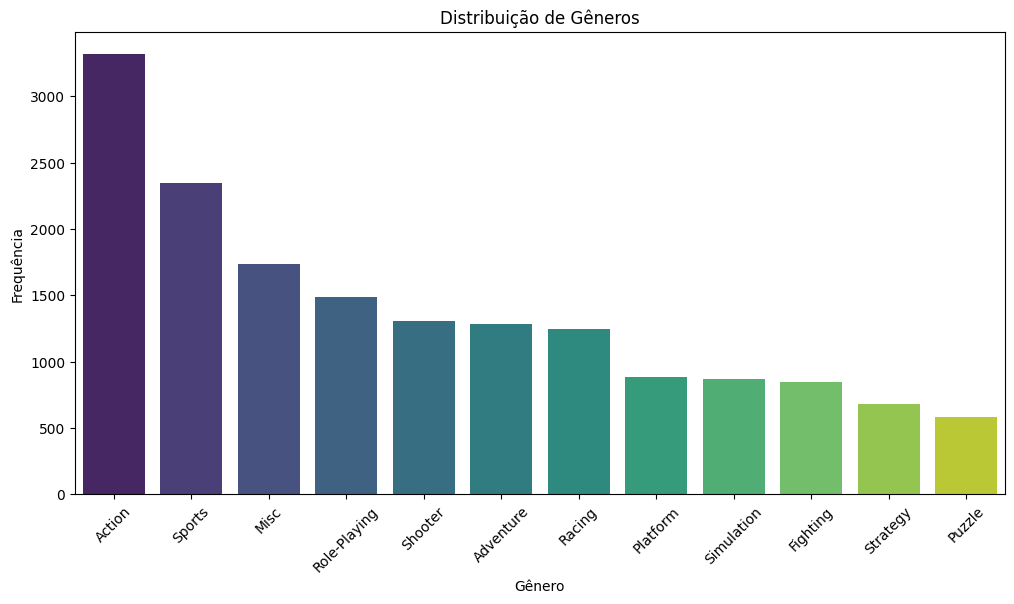

C:\Users\marco\AppData\Local\Temp\ipykernel_4920\2471665388.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Plataforma', order=df['Plataforma'].value_counts().index, palette='viridis')


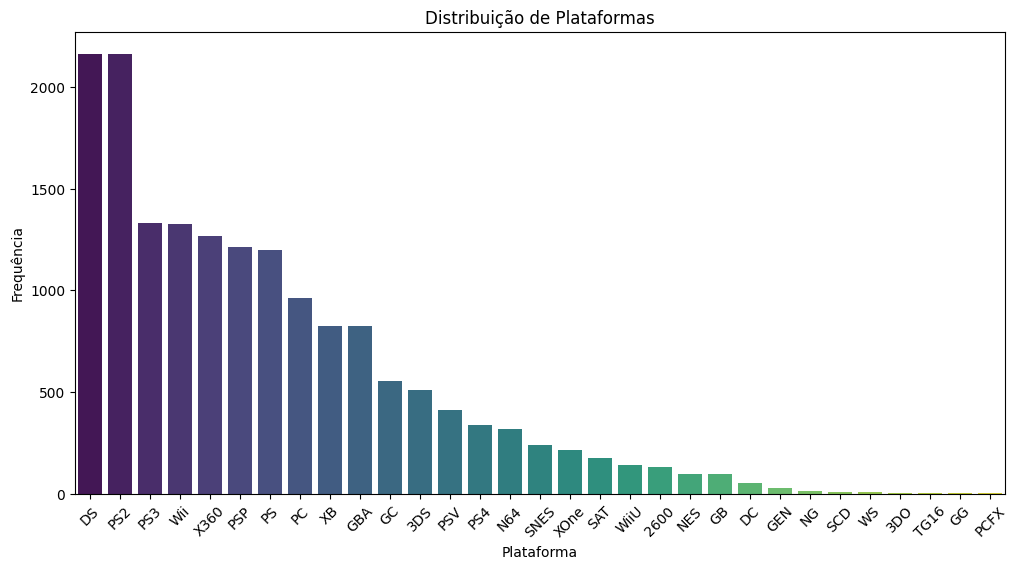

C:\Users\marco\AppData\Local\Temp\ipykernel_4920\2471665388.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top10_publishers, x='Publicação', order=limite_counts.index, palette='viridis')


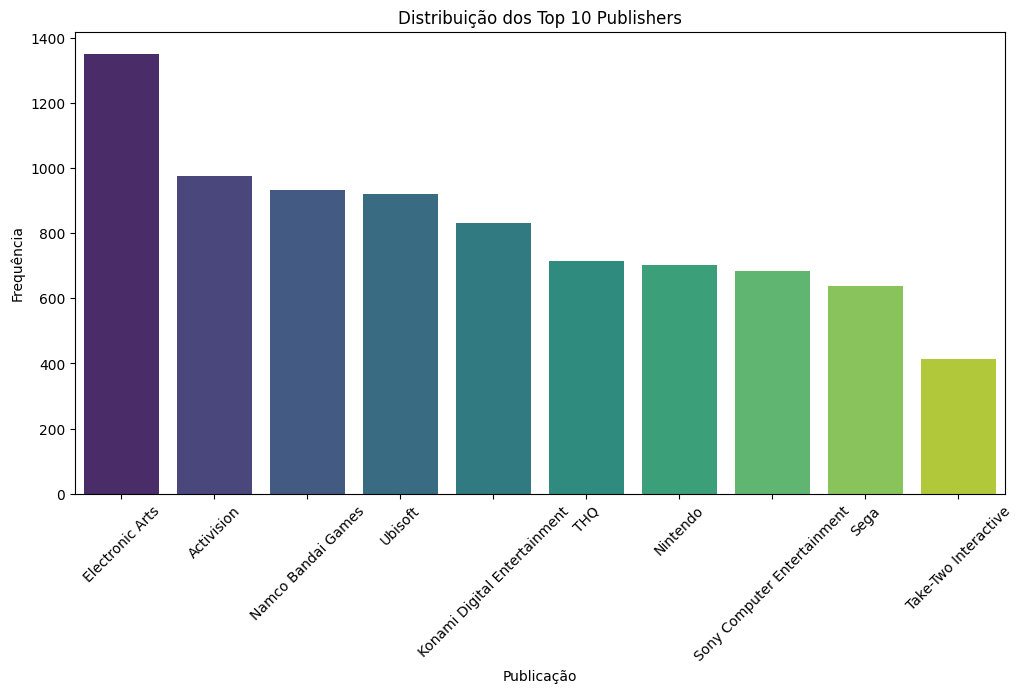

In [15]:
#distribuição de generos
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Gênero', order=df['Gênero'].value_counts().index, palette='viridis')
plt.title('Distribuição de Gêneros')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

#distribuicaoo de plataformas
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Plataforma', order=df['Plataforma'].value_counts().index, palette='viridis')
plt.title('Distribuição de Plataformas')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

#distribuicaoo de publishers (identificar os 10 maiores publishers)

publisher_counts = df['Publicação'].value_counts()
top_publishers = publisher_counts.nlargest(10).index
df_top10_publishers = df[df['Publicação'].isin(top_publishers)]
limite_counts = df_top10_publishers['Publicação'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top10_publishers, x='Publicação', order=limite_counts.index, palette='viridis')
plt.title('Distribuição dos Top 10 Publishers')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

## Teste de Hipótese 1: A América do Norte e a Europa têm médias de vendas iguais?

#### Hipótese Nula (H₀): A média das vendas na Europa é menor ou igual à média das vendas na América do Norte.
#### Hipótese Alternativa (H₁): A média das vendas na Europa é maior do que a média das vendas na América do Norte.


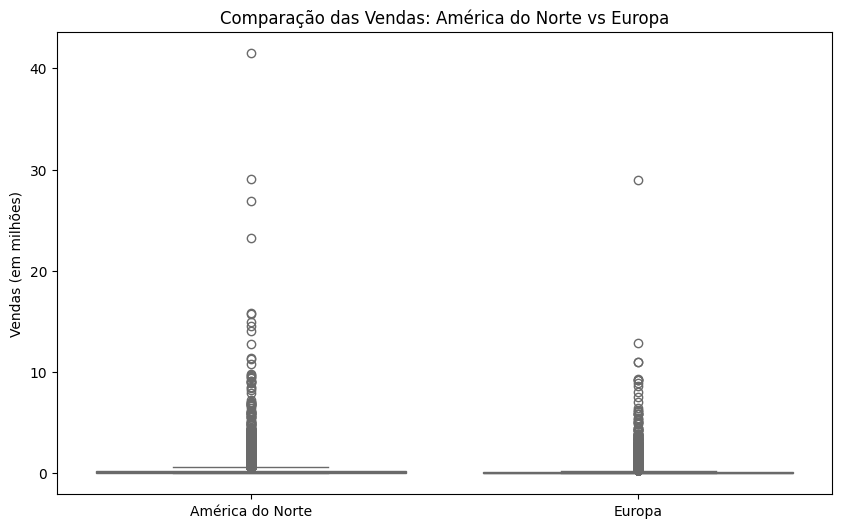

Estatística do teste t: -15.8314, p-valor: 1.0000
Não rejeitamos H₀: A média das vendas na Europa não é maior do que na América do Norte.


In [16]:
#selecionando as colunas de interesse
eu_sales = df['Europa'].dropna()
na_sales = df['America do Norte'].dropna()

# Boxplot para comparar as vendas na Europa e América do Norte
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['America do Norte', 'Europa']], palette='Set3')
plt.title('Comparação das Vendas: América do Norte vs Europa')
plt.ylabel('Vendas (em milhões)')
plt.xticks([0, 1], ['América do Norte', 'Europa'])
plt.show()


# Teste t com a hipótese alternativa 'greater'
stat, p = ttest_ind(eu_sales, na_sales, alternative='greater', equal_var=False)

print(f'Estatística do teste t: {stat:.4f}, p-valor: {p:.4f}')

alpha = 0.05
if p < alpha:
    print("Rejeitamos H₀: A média das vendas na Europa é maior do que na América do Norte.")
else:
    print("Não rejeitamos H₀: A média das vendas na Europa não é maior do que na América do Norte.")


## Teste de Hipótese 2: Jogos de Gênero 'Action' têm vendas globais maiores que outros gêneros?

#### Hipótese Nula (H₀): A média das vendas globais de jogos de ação é igual à de outros gêneros.
#### Hipótese Alternativa (H₁): A média das vendas globais de jogos de ação é maior que a de outros gêneros.

C:\Users\marco\AppData\Local\Temp\ipykernel_4920\3141160087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Action_Other', y='Geral', data=df, palette='Set3')


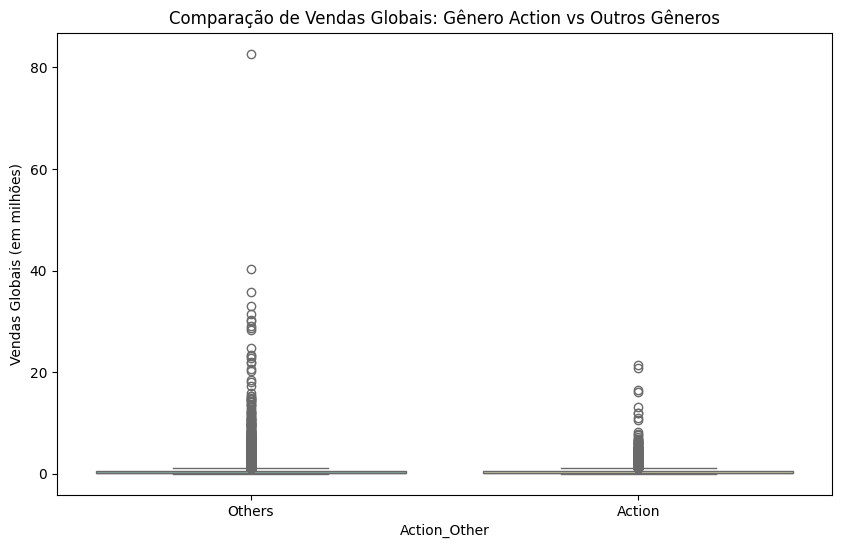

Estatística do teste t: -0.4743, p-valor: 0.6353
Não rejeitamos H₀: A média das vendas globais de jogos de ação não é maior que a de outros gêneros.


In [17]:
action_sales = df[df['Gênero'] == 'Action']['Geral'].dropna()
other_sales = df[df['Gênero'] != 'Action']['Geral'].dropna()

# Boxplot para comparar vendas globais do gênero Action e outros gêneros
df['Action_Other'] = df['Gênero'].apply(lambda x: 'Action' if x == 'Action' else 'Others')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Action_Other', y='Geral', data=df, palette='Set3')
plt.title('Comparação de Vendas Globais: Gênero Action vs Outros Gêneros')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

# Teste t para comparar Action com outros gêneros
stat, p = ttest_ind(action_sales, other_sales, equal_var=False)

print(f'Estatística do teste t: {stat:.4f}, p-valor: {p:.4f}')

alpha = 0.05
if p < alpha:
    print("Rejeitamos H₀: A média das vendas globais de jogos de ação é maior que a de outros gêneros.")
else:
    print("Não rejeitamos H₀: A média das vendas globais de jogos de ação não é maior que a de outros gêneros.")

## Análise de vendas ao longo do tempo

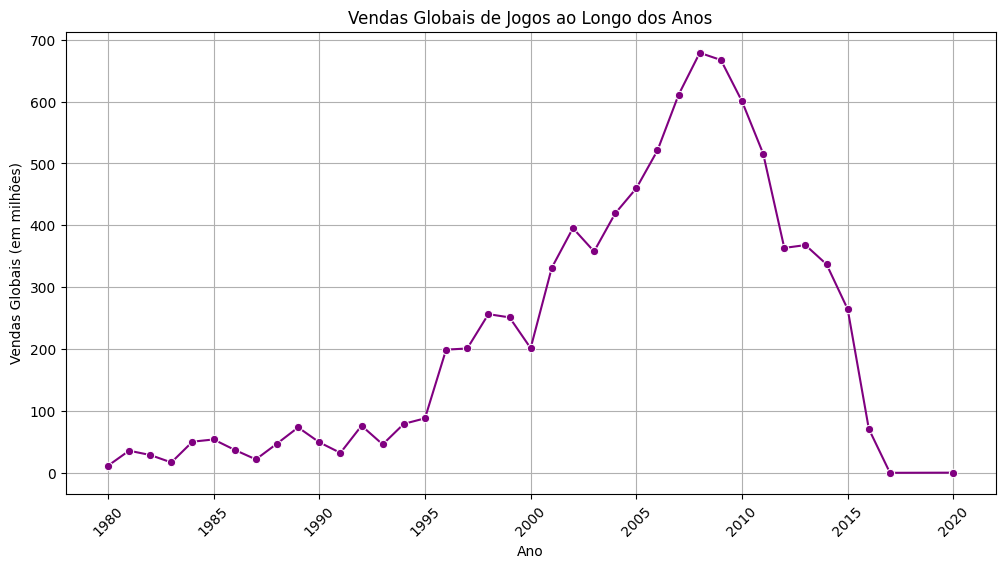

Número de linhas antes de remover outliers: 16598
Número de linhas após remover outliers: 14705
Teste t-statistic: -0.8241112449496337
P-valor: 0.4099348517328745
As vendas globais entre 'Action' e 'Sports' não são significativamente diferentes (falha em rejeitar H0).
Qui-quadrado: 1153.2724564436257, P-valor: 3.715934222703676e-251
As proporções dos gêneros mais vendidos no Oriente e Ocidente são significativamente diferentes (rejeita-se H0).
A análise dos gêneros de jogos revela que os jogos de 'Action' e 'Sports' dominam o mercado.
Além disso, as vendas na América do Norte têm uma correlação forte com as vendas globais, o que sugere que o mercado norte-americano é um bom indicador de sucesso global.


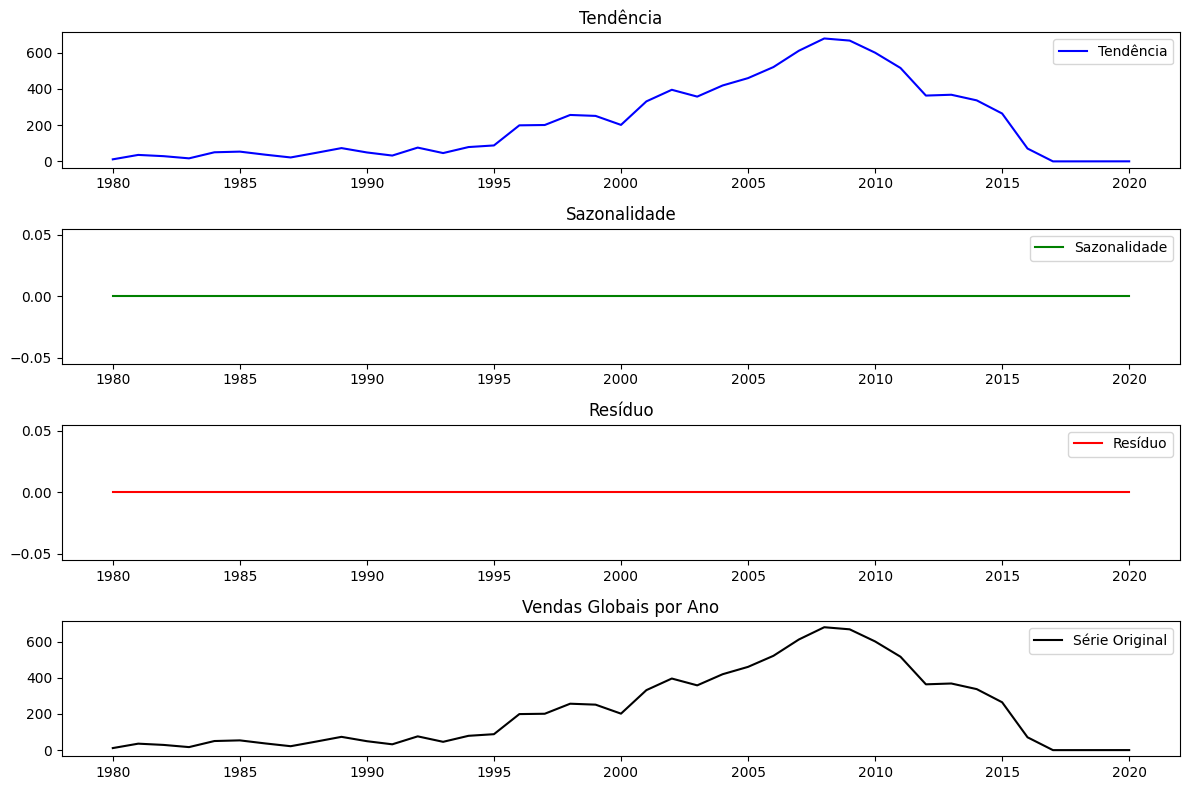

In [18]:
# Primeiro, garantimos que a coluna 'Ano' esteja em formato numérico
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Agrupar vendas globais por ano
vendas_ano = df.groupby('Ano')['Geral'].sum().reset_index()

# Plotar a série temporal
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_ano, x='Ano', y='Geral', marker='o', color='purple')
plt.title('Vendas Globais de Jogos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Função para remover outliers baseada no IQR
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[coluna] >= lower_bound) & (df[coluna] <= upper_bound)]

# Remover outliers de Geral
df_sem_outliers = remover_outliers(df, 'Geral')

print(f"Número de linhas antes de remover outliers: {df.shape[0]}")
print(f"Número de linhas após remover outliers: {df_sem_outliers.shape[0]}")

# Teste t para comparar as médias de vendas globais entre 'Action' e 'Sports'
action_sales = df[df['Gênero'] == 'Action']['Geral'].dropna()
sports_sales = df[df['Gênero'] == 'Sports']['Geral'].dropna()

t_stat, p_valor_t = ttest_ind(action_sales, sports_sales, equal_var=False)
print(f"Teste t-statistic: {t_stat}")
print(f"P-valor: {p_valor_t}")

if p_valor_t < 0.05:
    print("As vendas globais entre 'Action' e 'Sports' são significativamente diferentes (rejeita-se H0).")
else:
    print("As vendas globais entre 'Action' e 'Sports' não são significativamente diferentes (falha em rejeitar H0).")

# Análise de gêneros mais vendidos no Oriente e Ocidente
top_oriente = df.groupby('Gênero')['Japão'].sum().nlargest(3).index
top_ocidente = df.groupby('Gênero')['America do Norte'].sum().nlargest(3).index

# Criar tabela de contingência para o teste qui-quadrado
contingency_table = pd.DataFrame({
    'Ocidente': [sum((df['Gênero'] == Gênero) & (df['America do Norte'].notnull())) for Gênero in top_ocidente],
    'Oriente': [sum((df['Gênero'] == Gênero) & (df['Japão'].notnull())) for Gênero in top_oriente]
}, index=top_oriente)

chi2, p_valor_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Qui-quadrado: {chi2}, P-valor: {p_valor_chi2}")

if p_valor_chi2 < 0.05:
    print("As proporções dos gêneros mais vendidos no Oriente e Ocidente são significativamente diferentes (rejeita-se H0).")
else:
    print("As proporções dos gêneros mais vendidos no Oriente e Ocidente não são significativamente diferentes (falha em rejeitar H0).")

# Conectar as análises com perguntas de negócio
print("A análise dos gêneros de jogos revela que os jogos de 'Action' e 'Sports' dominam o mercado.")
print("Além disso, as vendas na América do Norte têm uma correlação forte com as vendas globais, o que sugere que o mercado norte-americano é um bom indicador de sucesso global.")

from statsmodels.tsa.seasonal import seasonal_decompose

# Agrupar as vendas globais por ano e calcular a soma total de vendas em cada ano
vendas_por_ano = df.groupby('Ano')['Geral'].sum()

# Remover anos com valores faltantes (caso haja)
vendas_por_ano.dropna(inplace=True)

# Criar uma série temporal com as vendas globais por ano
vendas_ts = vendas_por_ano

# Decomposição da série temporal
decomposicao = seasonal_decompose(vendas_ts, model='additive', period=1)

# Plotar os componentes da decomposição
plt.figure(figsize=(12, 8))

# Componente de tendência
plt.subplot(411)
plt.plot(decomposicao.trend, label='Tendência', color='blue')
plt.title('Tendência')
plt.legend()

# Componente sazonal
plt.subplot(412)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.legend()

# Componente de ruído (resíduo)
plt.subplot(413)
plt.plot(decomposicao.resid, label='Resíduo', color='red')
plt.title('Resíduo')
plt.legend()

# Série original
plt.subplot(414)
plt.plot(vendas_ts, label='Série Original', color='black')
plt.title('Vendas Globais por Ano')
plt.legend()

plt.tight_layout()
plt.show()


## Análise da Decomposição da Série Temporal:

1. Tendência (Trend):

    A tendência indica um crescimento acentuado nas vendas globais a partir de meados dos anos 1990 até o pico em torno de 2008-2009.
    Após o pico, observa-se um declínio constante nas vendas globais até por volta de 2015, com uma queda significativa até 2020, sugerindo que o mercado de jogos pode ter passado por uma fase de saturação ou mudança de tendências no consumo.

2. Sazonalidade (Seasonal):

    O gráfico de sazonalidade mostra uma linha plana, o que indica ausência de padrões sazonais significativos. Isso sugere que as vendas de jogos não seguem um padrão de repetição regular (como vendas cíclicas ou sazonais por ano), sendo influenciadas por outros fatores mais longos ou externos.

3. Resíduo (Residual):

    O gráfico de resíduos também apresenta uma linha plana. Isso indica que não há muitos fatores não explicados pela tendência. Ou seja, a maior parte da variação das vendas é capturada pela componente de tendência, e os ruídos são mínimos, o que reforça a ausência de padrões sazonais e de grandes flutuações aleatórias.

4. Série Original:

    A série original reflete o comportamento bruto das vendas globais por ano, que segue a mesma forma da tendência. O comportamento de crescimento, seguido por um declínio acentuado, é visível. Esse padrão, além de sugerir saturação, pode indicar mudanças na forma como os jogos são vendidos (como transição para vendas digitais) ou mudanças nas preferências dos consumidores ao longo dos anos.

Conclusão:

    Crescimento seguido de queda: A tendência geral das vendas globais de jogos mostrou um crescimento significativo até o final da década de 2000, seguido de um declínio acentuado até 2020.
    Ausência de sazonalidade: Não há padrões sazonais claros nas vendas, sugerindo que os fatores que influenciam as vendas de jogos não seguem um ciclo regular anual.
    Pouca variabilidade não explicada: A baixa variabilidade no resíduo indica que a maior parte do comportamento das vendas pode ser explicada pela tendência de longo prazo, sem grandes flutuações inesperadas.

Esse comportamento pode ser atribuído a diversos fatores, como o crescimento inicial do mercado de videogames, seguido pela saturação e pela transição para novas plataformas e modelos de negócios (como serviços de streaming e vendas digitais).